In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.signal import welch

mat = scipy.io.loadmat('File1-20240130.mat')

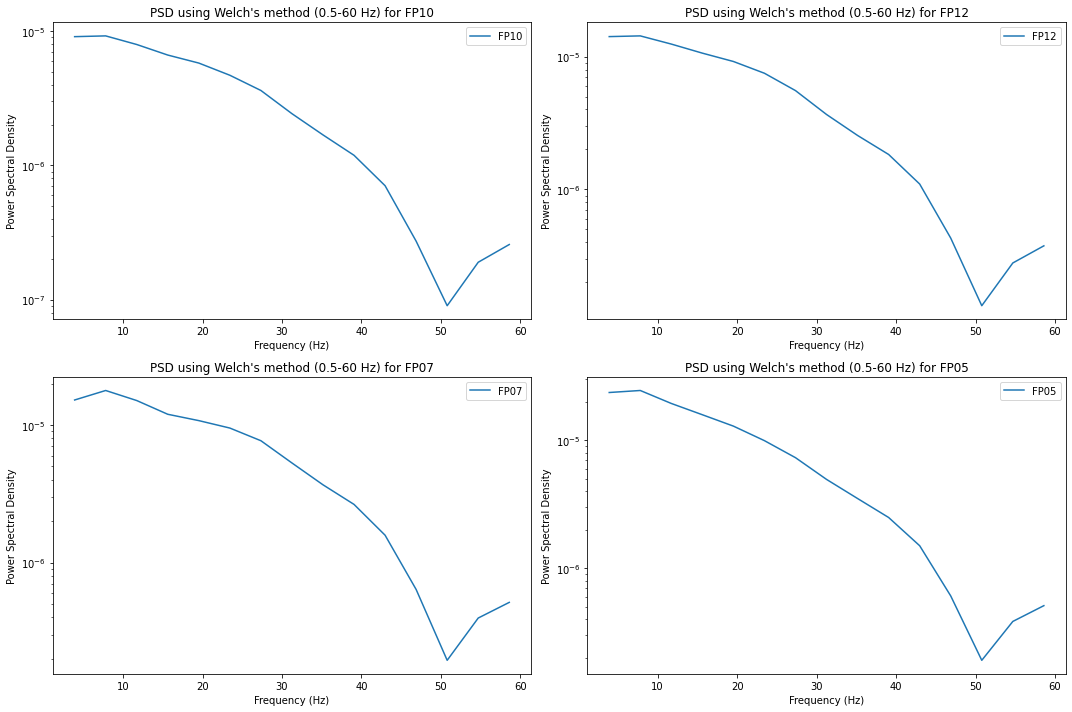

In [9]:
# 特定の周波数範囲を定義
min_freq = 0.5
max_freq = 60

# サンプリングレートを定義 (仮の値です、実際の値に置き換えてください)
sampling_rate = 1000

# データセットのリスト (仮のデータです、実際のデータに置き換えてください)
datasets = {
    'FP10': mat['FP10'],
    'FP12': mat['FP12'],
    'FP07': mat['FP07'],
    'FP05': mat['FP05']
}

# 各データセットに対してウェルチ法を適用し、プロット
plt.figure(figsize=(15, 10))

for i, (label, data) in enumerate(datasets.items(), 1):
    frequencies, psd = welch(data.flatten(), fs=sampling_rate)
    mask = (frequencies >= min_freq) & (frequencies <= max_freq)
    frequencies_filtered = frequencies[mask]
    psd_filtered = psd[mask]
    
    plt.subplot(2, 2, i)
    plt.semilogy(frequencies_filtered, psd_filtered, label=label)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density')
    plt.title(f'PSD using Welch\'s method ({min_freq}-{max_freq} Hz) for {label}')
    plt.legend()

plt.tight_layout()
plt.show()

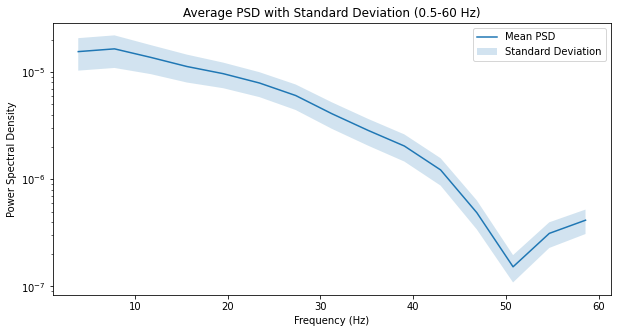

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch

# 特定の周波数範囲を定義
min_freq = 0.5
max_freq = 60

# サンプリングレートを定義
sampling_rate = 1000

# データセットのリスト
datasets = {
    'FP10': mat['FP10'],
    'FP12': mat['FP12'],
    'FP07': mat['FP07'],
    'FP05': mat['FP05']
}

# 各データセットのPSDを格納するリスト
psds = []

# 各データセットに対してウェルチ法を適用
for label, data in datasets.items():
    frequencies, psd = welch(data.flatten(), fs=sampling_rate)
    mask = (frequencies >= min_freq) & (frequencies <= max_freq)
    psd_filtered = psd[mask]
    psds.append(psd_filtered)

# PSDの平均と標準偏差を計算
psds = np.array(psds)
mean_psd = np.mean(psds, axis=0)
std_psd = np.std(psds, axis=0)

# 平均PSDと標準偏差を使用してプロット
plt.figure(figsize=(10, 5))
plt.semilogy(frequencies[mask], mean_psd, label='Mean PSD')
plt.fill_between(frequencies[mask], mean_psd - std_psd, mean_psd + std_psd, alpha=0.2, label='Standard Deviation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title(f'Average PSD with Standard Deviation ({min_freq}-{max_freq} Hz)')
plt.legend()
plt.show()

In [12]:
import pandas as pd

# データフレームを作成
df = pd.DataFrame({
    'Frequency': frequencies[mask],
    'Mean_PSD': mean_psd,
    'Std_PSD': std_psd
})

# CSVファイルに保存
csv_file_path = 'psd_iso2.csv'  # 保存するファイルのパス
df.to_csv(csv_file_path, index=False)

print(f'Data saved to {csv_file_path}')

Data saved to psd_iso2.csv


In [13]:
import pandas as pd

# 各CSVファイルを読み込む
psd_iso = pd.read_csv('psd_iso2.csv')
psd_mix = pd.read_csv('psd_mix2.csv')
psd_ketamine = pd.read_csv('psd_ketamine2.csv')

# 読み込んだデータの先頭を表示して確認
print(psd_iso.head())
print(psd_mix.head())
print(psd_ketamine.head())

   Frequency  Mean_PSD   Std_PSD
0    3.90625  0.000015  0.000005
1    7.81250  0.000016  0.000006
2   11.71875  0.000014  0.000004
3   15.62500  0.000011  0.000003
4   19.53125  0.000010  0.000003
   Frequency      Mean_PSD       Std_PSD
0    3.90625  4.401391e-05  2.523874e-05
1    7.81250  1.185568e-05  6.556516e-06
2   11.71875  3.440980e-06  1.859158e-06
3   15.62500  1.635437e-06  8.782838e-07
4   19.53125  8.774123e-07  4.743288e-07
   Frequency  Mean_PSD       Std_PSD
0    3.90625  0.000043  1.417465e-05
1    7.81250  0.000015  4.589879e-06
2   11.71875  0.000004  1.075689e-06
3   15.62500  0.000002  4.808535e-07
4   19.53125  0.000001  2.904406e-07


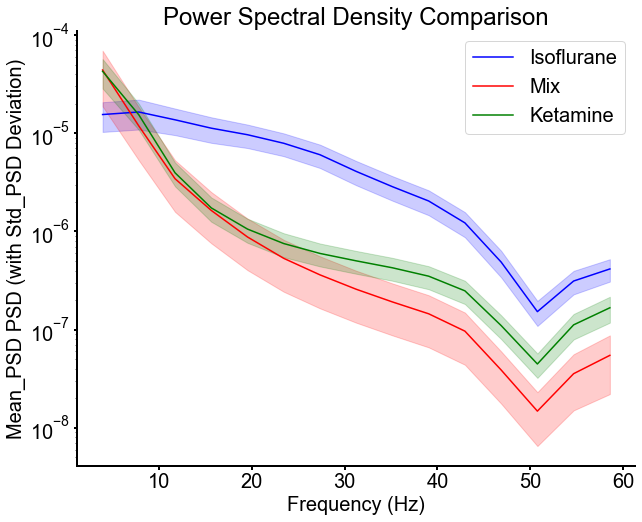

In [26]:
# フォントと線の太さを設定
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20
#plt.rcParams['axes.linewidth'] = 2  # 軸の線を太くする

# グラフを描画
plt.figure(figsize=(10, 8))

# 平均値と標準偏差の範囲を網掛けで表示
plt.fill_between(psd_iso['Frequency'], psd_iso['Mean_PSD'] - psd_iso['Std_PSD'], psd_iso['Mean_PSD'] + psd_iso['Std_PSD'], color='blue', alpha=0.2)
plt.fill_between(psd_mix['Frequency'], psd_mix['Mean_PSD'] - psd_mix['Std_PSD'], psd_mix['Mean_PSD'] + psd_mix['Std_PSD'], color='red', alpha=0.2)
plt.fill_between(psd_ketamine['Frequency'], psd_ketamine['Mean_PSD'] - psd_ketamine['Std_PSD'], psd_ketamine['Mean_PSD'] + psd_ketamine['Std_PSD'], color='green', alpha=0.2)

# 平均値をプロット
plt.plot(psd_iso['Frequency'], psd_iso['Mean_PSD'], label='Isoflurane', linestyle='-', color='blue')
plt.plot(psd_mix['Frequency'], psd_mix['Mean_PSD'], label='Mix', linestyle='-', color='red')
plt.plot(psd_ketamine['Frequency'], psd_ketamine['Mean_PSD'], label='Ketamine', linestyle='-', color='green')

# グラフのタイトルと軸ラベルを設定
plt.title('Power Spectral Density Comparison')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mean_PSD PSD (with Std_PSD Deviation)')
plt.yscale('log')

# 軸の目盛り線を太くする
plt.gca().tick_params(width=2)

# グラフの上と右の枠線を消し、残りの枠線を太くする
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)

# 凡例を表示
plt.legend()

# グラフを表示
plt.show()

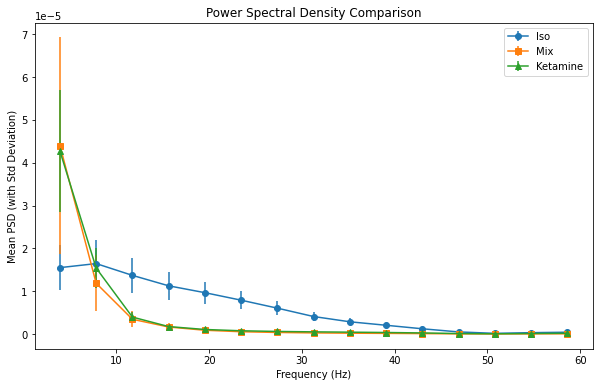

In [15]:
import matplotlib.pyplot as plt

# 各データセットをプロット
plt.figure(figsize=(10, 6))

plt.errorbar(psd_iso['Frequency'], psd_iso['Mean_PSD'], yerr=psd_iso['Std_PSD'], label='Iso', fmt='-o')
plt.errorbar(psd_mix['Frequency'], psd_mix['Mean_PSD'], yerr=psd_mix['Std_PSD'], label='Mix', fmt='-s')
plt.errorbar(psd_ketamine['Frequency'], psd_ketamine['Mean_PSD'], yerr=psd_ketamine['Std_PSD'], label='Ketamine', fmt='-^')

# グラフのタイトルと軸ラベルを設定
plt.title('Power Spectral Density Comparison')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mean PSD (with Std Deviation)')

# 凡例を表示
plt.legend()

# グラフを表示
plt.show()

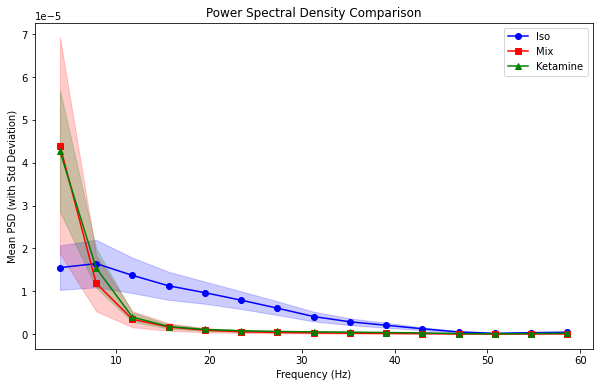

In [16]:
import matplotlib.pyplot as plt

# 各データセットをプロット
plt.figure(figsize=(10, 6))

# 平均値と標準偏差の範囲を網掛けで表示
plt.fill_between(psd_iso['Frequency'], psd_iso['Mean_PSD'] - psd_iso['Std_PSD'], psd_iso['Mean_PSD'] + psd_iso['Std_PSD'], color='blue', alpha=0.2)
plt.fill_between(psd_mix['Frequency'], psd_mix['Mean_PSD'] - psd_mix['Std_PSD'], psd_mix['Mean_PSD'] + psd_mix['Std_PSD'], color='red', alpha=0.2)
plt.fill_between(psd_ketamine['Frequency'], psd_ketamine['Mean_PSD'] - psd_ketamine['Std_PSD'], psd_ketamine['Mean_PSD'] + psd_ketamine['Std_PSD'], color='green', alpha=0.2)

# 平均値をプロット（修正された部分）
plt.plot(psd_iso['Frequency'], psd_iso['Mean_PSD'], label='Iso', marker='o', linestyle='-', color='blue')
plt.plot(psd_mix['Frequency'], psd_mix['Mean_PSD'], label='Mix', marker='s', linestyle='-', color='red')
plt.plot(psd_ketamine['Frequency'], psd_ketamine['Mean_PSD'], label='Ketamine', marker='^', linestyle='-', color='green')

# グラフのタイトルと軸ラベルを設定
plt.title('Power Spectral Density Comparison')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mean PSD (with Std Deviation)')

# 凡例を表示
plt.legend()

# グラフを表示
plt.show()